## Test Sampling theorem : 
**The wave that accompanies the source wave, according to sampling theorem must have frequency greater that twice the frequency of source wave**

So write python code to generate a source wave, sampling it with three waves:
1) f_sample > 2.f_source
2) f_sample = 2.f_source
3) f_sample < 2.f_source

and then show the source wave compared to the interpreted wave by the receiver (receiver has to remove/revert the sampling to get original wave)

In [27]:
import numpy as np 
import matplotlib.pyplot as plt

### Taking source wave and sample wave in different cases

In [28]:
# we are taking sine wave of 5Hz freq as source

f_source = 5      # frequency in Hz
duration = 1
f_nyquist = 2 * f_source # The Nyquist frequency (10 Hz in this case)

# Define the three sampling frequencies
f_sample1 = 50     # Case 1: Oversampling (50 Hz > 10 Hz)
f_sample2 = 10.1   # Case 2: Critical/Nyquist Rate Sampling (10 Hz = 10 Hz)
f_sample3 = 7      # Case 3: Undersampling (7 Hz < 10 Hz)

### Create a High-Resolution Analog Signal for Visualization

To simulate an **analog (continuous)** signal in Python, we first create a **high-resolution time axis**.  
This dense sampling helps us *visually approximate* a continuous waveform.

---

#### Create a high-resolution "analog" time axis

`np.linspace(start, stop, num, endpoint=False)` generates `num` evenly spaced values  
between `0` and `duration`.  

Here, we take **1000 points per second** (very dense sampling)  
to simulate a *continuous* time signal.  
This acts as our **analog signal timeline**.

We generate a **5 Hz sine wave** to represent the original continuous-time (analog) signal.

The mathematical equation of the sine wave is:

$$
x(t) = \sin(2\pi f_{\text{source}} t)
$$

where:  
- $x(t)$ → instantaneous amplitude of the wave at time $t$  
- $f_{\text{source}}$ → frequency of the signal (5 Hz in this case)  
- $t$ → time (in seconds)

In [29]:
t_analog = np.linspace(0, duration, int(1000 * duration), endpoint=False)
source_wave = np.sin(2 * np.pi * f_source * t_analog)

### Generate the Discrete Time Points and Sampled Values for Each Case

`t = np.arange(0, duration, 1/f_sample)` creates discrete time instants spaced by the sampling period **T = 1/fₛ**.  
Each time point represents when the analog signal is sampled to obtain its corresponding value.


In [30]:
t1, t2, t3 = [np.arange(0, duration, 1/fs) for fs in [f_sample1, f_sample2, f_sample3]]
sampled1, sampled2, sampled3 = [np.sin(2 * np.pi * f_source * t) for t in [t1, t2, t3]]

### Signal Reconstruction Using Sinc Interpolation

After sampling, we only have **discrete data points** of the original signal.  
To recreate the **continuous-time wave**, we use **sinc interpolation**, which is the ideal reconstruction method defined by the Sampling Theorem.

Each sample generates a **sinc-shaped pulse** centered at its sampling instant, and the final reconstructed signal is the **sum of all these shifted sinc pulses**.

Mathematically:

$$
x(t) = \sum_{n=-\infty}^{\infty} x[n] \cdot \text{sinc}\left(\frac{t - nT}{T}\right)
$$

where:  
- $x[n]$ → sampled values  
- $T = 1 / f_s$ → sampling period  
- $\text{sinc}(x) = \dfrac{\sin(\pi x)}{\pi x}$



In [31]:
def sinc_reconstruction(samples, sample_times, high_res_times):
    """Reconstructs a signal from samples using sinc interpolation."""
    if len(samples) == 0:                                  #if sample is empty return zero array
        return np.zeros_like(high_res_times)     

    # Get the sampling period
    T = sample_times[1] - sample_times[0]           

    # Use numpy broadcasting to create a matrix of sinc values
    sinc_matrix = np.sinc((high_res_times[:, np.newaxis] - sample_times) / T)

    # Reconstruct by dot product
    return np.dot(sinc_matrix, samples)

reconstructed1 = sinc_reconstruction(sampled1, t1, t_analog)
reconstructed2 = sinc_reconstruction(sampled2, t2, t_analog)
reconstructed3 = sinc_reconstruction(sampled3, t3, t_analog)

### Plot and compare each signal with the original

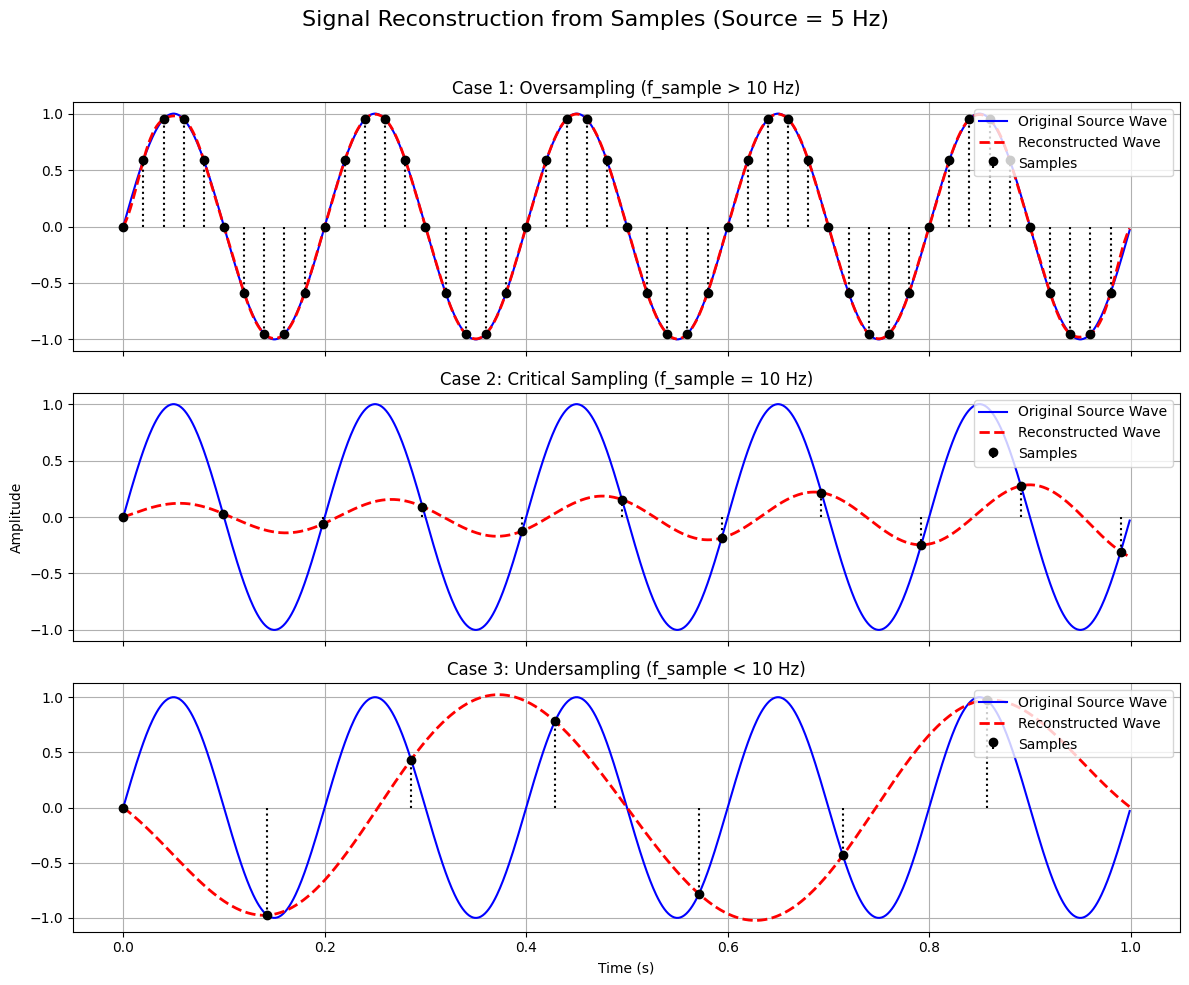

In [32]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
fig.suptitle(f"Signal Reconstruction from Samples (Source = {f_source} Hz)", fontsize=16)
for ax, rec, samp, t, case in zip(axs,
                                  [reconstructed1, reconstructed2, reconstructed3],
                                  [sampled1, sampled2, sampled3],
                                  [t1, t2, t3],
                                  [1, 2, 3]):
    if case == 1:
        title = f"Case 1: Oversampling (f_sample > {f_nyquist} Hz)"
    elif case == 2:
        title = f"Case 2: Critical Sampling (f_sample = {f_nyquist} Hz)"
        ax.set_ylabel("Amplitude")
    else:
        title = f"Case 3: Undersampling (f_sample < {f_nyquist} Hz)"
        ax.set_xlabel("Time (s)")

    ax.plot(t_analog, source_wave, 'b-', label='Original Source Wave')
    ax.plot(t_analog, rec, 'r--', linewidth=2, label='Reconstructed Wave')
    ax.stem(t, samp, linefmt='k:', markerfmt='ko', basefmt=" ", label='Samples')
    ax.set_title(title)
    ax.legend(loc='upper right')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()